In [1]:
import pandas
import matplotlib.pyplot as plt

In [2]:
df_cwi = pandas.read_pickle("cwi_2018.pkl")
df_lcp = pandas.read_pickle("lcp_2021.pkl")

In [3]:
df_cwi = df_cwi.drop(columns=["id", "context", "begin", "end", "native_annotators", "non-native_annotators", "native_comp", "non-native_comp", "bin_comp", 'subjective'])
df_cwi = df_cwi.rename(columns={'Token':'token', 'prob_comp':'complexity'})
df_lcp = df_lcp.drop(columns=['anno_count'])

In [4]:
df_mrg = df_lcp.merge(df_cwi, on='token', how='inner', suffixes=('_lcp', '_cwi'))

In [5]:
print(len(df_cwi))
print(len(df_lcp))
print(len(df_mrg))

34879
10800
26166


<AxesSubplot:xlabel='complexity_lcp', ylabel='complexity_cwi'>

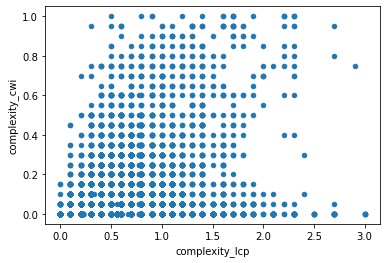

In [6]:
df_mrg.plot.scatter(x='complexity_lcp',y='complexity_cwi')

<AxesSubplot:xlabel='subjectivity_lcp', ylabel='subjectivity_cwi'>

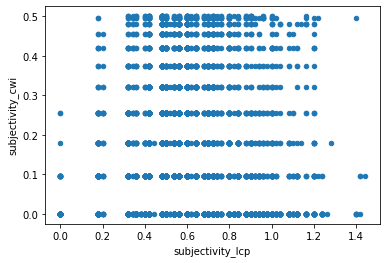

In [7]:
df_mrg.plot.scatter(x='subjectivity_lcp',y='subjectivity_cwi')

In [8]:
df_mrg.corr()

,complexity_lcp,subjectivity_lcp,complexity_cwi,subjectivity_cwi
complexity_lcp,1.000000,0.775236,0.314347,0.274034
subjectivity_lcp,0.775236,1.000000,0.191030,0.189142
complexity_cwi,0.314347,0.191030,1.000000,0.827473
subjectivity_cwi,0.274034,0.189142,0.827473,1.000000


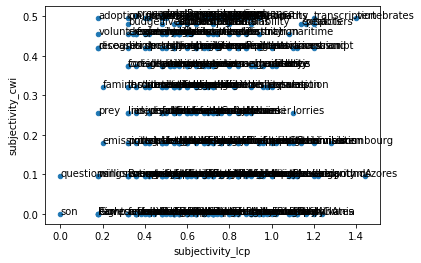

In [9]:
fig, ax = plt.subplots()
df_plt = df_mrg.drop_duplicates(subset='token').drop_duplicates(subset=['subjectivity_lcp','subjectivity_cwi']).sample(frac=1.0)
df_plt.plot(x='subjectivity_lcp',y='subjectivity_cwi', kind='scatter', ax=ax)

for k,v in df_plt.iterrows():
    ax.annotate(v.token, [v.subjectivity_lcp, v.subjectivity_cwi])
    
fig.savefig("Figures/LCP_v_CWI10.pdf")